In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('./data/BodyFat.csv')
df = df.drop(columns=['IDNO'])

df['WEIGHT'] = df['WEIGHT'].transform(lambda x: x * 0.453592).round(1)
df['HEIGHT'] = df['HEIGHT'].transform(lambda x: x * 2.54).round(1)

df.to_csv('./data/BodyFat_SI.csv', index = False)

df.head(10)

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,12.6,1.0708,23,70.0,172.1,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,1.0853,22,78.6,183.5,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,1.0414,22,69.9,168.3,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,1.0751,26,83.8,183.5,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,1.0340,24,83.6,181.0,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,20.6,1.0502,24,95.4,189.9,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,19.0,1.0549,26,82.1,177.2,26.2,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,12.8,1.0704,25,79.8,184.2,23.6,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,5.1,1.0900,25,86.6,188.0,24.6,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,12.0,1.0722,23,89.9,186.7,25.8,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


In [3]:
df.insert(1, 'CALC_BODYFAT', (495 / df['DENSITY'] - 450).round(1))
df.insert(2, 'BODYFAT_DIFF', np.abs(df['CALC_BODYFAT'] - df['BODYFAT']).round(1))

df.insert(6, 'CALC_WEIGHT', (df['ADIPOSITY'] * (df['HEIGHT']/100)**2).round(1))
df.insert(7, 'WEIGHT_DIFF', np.abs(df['CALC_WEIGHT'] - df['WEIGHT']).round(1))

df.insert(9, 'CALC_HEIGHT', (np.sqrt(df['WEIGHT'] / df['ADIPOSITY'])*100).round(1))
df.insert(10, 'HEIGHT_DIFF', np.abs(df['CALC_HEIGHT'] - df['HEIGHT']).round(1))
# df.insert(8, 'CALC_BMI', (df['WEIGHT'] / (df['HEIGHT']/100)**2).round(1))
# df.insert(9, 'BMI_DIFF', np.abs(df['CALC_BMI'] - df['ADIPOSITY']).round(1))

df.head(10)

,BODYFAT,CALC_BODYFAT,BODYFAT_DIFF,DENSITY,AGE,WEIGHT,CALC_WEIGHT,WEIGHT_DIFF,HEIGHT,CALC_HEIGHT,...,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,12.6,12.3,0.3,1.0708,23,70.0,70.2,0.2,172.1,171.9,...,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,6.1,0.8,1.0853,22,78.6,78.8,0.2,183.5,183.3,...,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,25.3,0.7,1.0414,22,69.9,70.0,0.1,168.3,168.2,...,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,10.4,0.5,1.0751,26,83.8,83.8,0.0,183.5,183.5,...,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,28.7,0.9,1.0340,24,83.6,83.9,0.3,181.0,180.7,...,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,20.6,21.3,0.7,1.0502,24,95.4,95.6,0.2,189.9,189.7,...,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,19.0,19.2,0.2,1.0549,26,82.1,82.3,0.2,177.2,177.0,...,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,12.8,12.4,0.4,1.0704,25,79.8,80.1,0.3,184.2,183.9,...,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,5.1,4.1,1.0,1.0900,25,86.6,86.9,0.3,188.0,187.6,...,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,12.0,11.7,0.3,1.0722,23,89.9,89.9,0.0,186.7,186.7,...,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


array([[<AxesSubplot:title={'center':'BODYFAT'}>,
        <AxesSubplot:title={'center':'CALC_BODYFAT'}>,
        <AxesSubplot:title={'center':'BODYFAT_DIFF'}>,
        <AxesSubplot:title={'center':'DENSITY'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'WEIGHT'}>,
        <AxesSubplot:title={'center':'CALC_WEIGHT'}>,
        <AxesSubplot:title={'center':'WEIGHT_DIFF'}>,
        <AxesSubplot:title={'center':'HEIGHT'}>,
        <AxesSubplot:title={'center':'CALC_HEIGHT'}>],
       [<AxesSubplot:title={'center':'HEIGHT_DIFF'}>,
        <AxesSubplot:title={'center':'ADIPOSITY'}>,
        <AxesSubplot:title={'center':'NECK'}>,
        <AxesSubplot:title={'center':'CHEST'}>,
        <AxesSubplot:title={'center':'ABDOMEN'}>],
       [<AxesSubplot:title={'center':'HIP'}>,
        <AxesSubplot:title={'center':'THIGH'}>,
        <AxesSubplot:title={'center':'KNEE'}>,
        <AxesSubplot:title={'center':'ANKLE'}>,
        <AxesSubplot:title={'center':'BIC

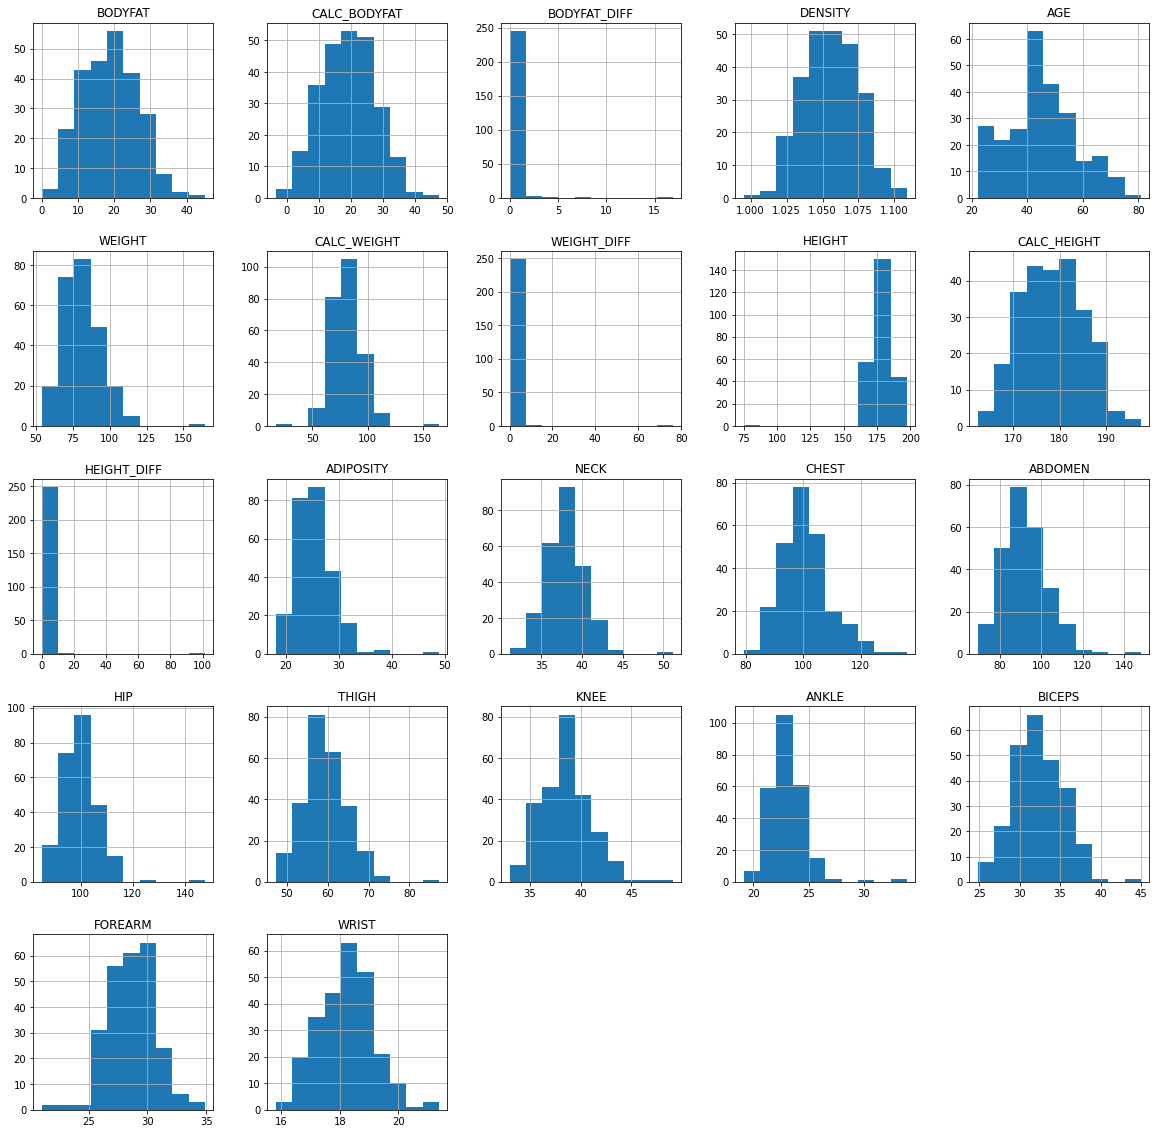

In [4]:
df.hist(figsize=(20, 20))

<AxesSubplot:>

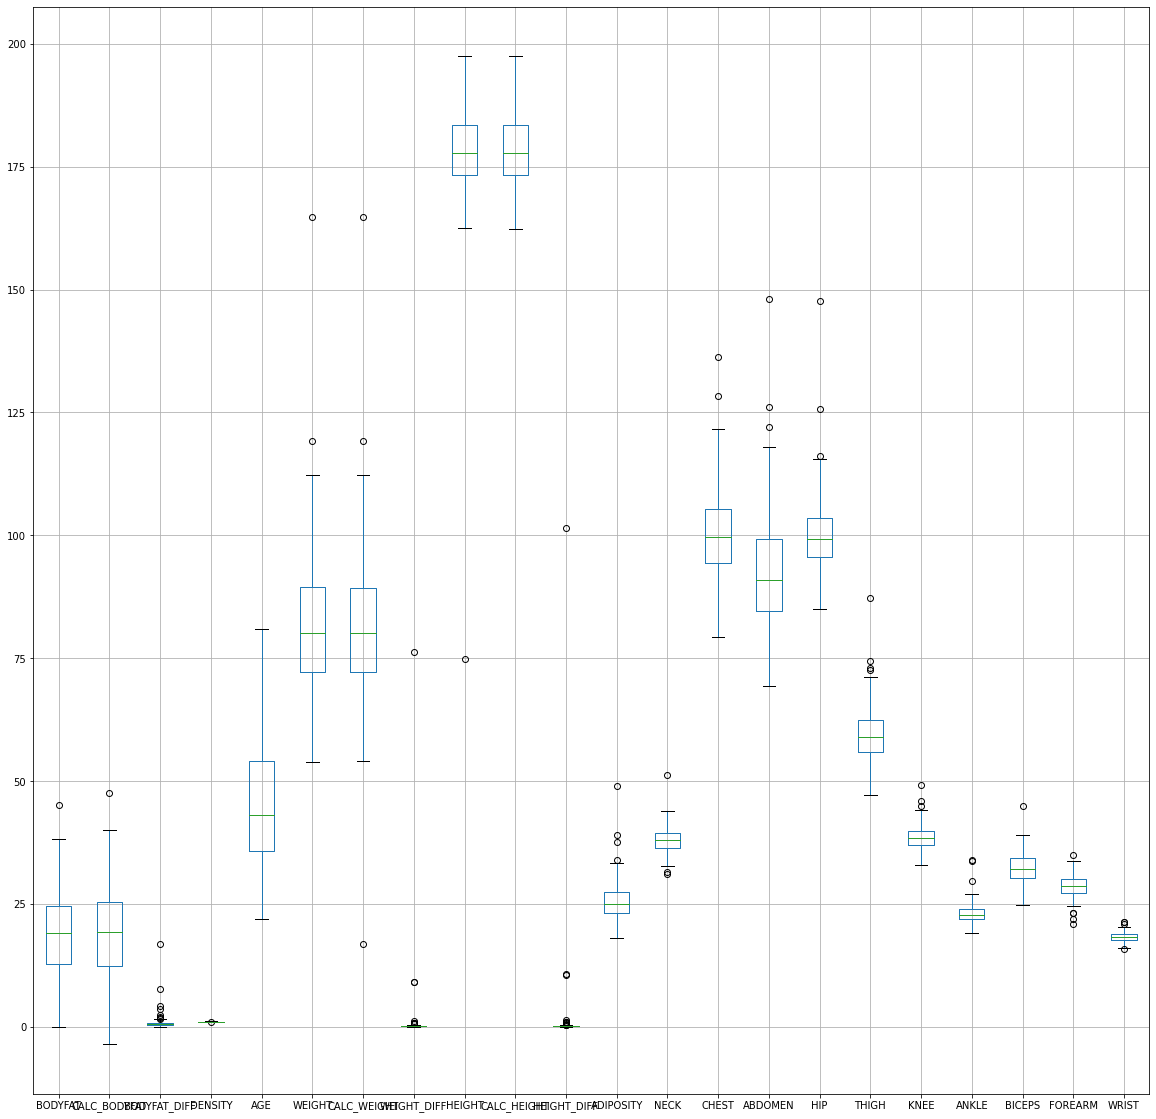

In [5]:
df.boxplot(figsize=(20, 20))

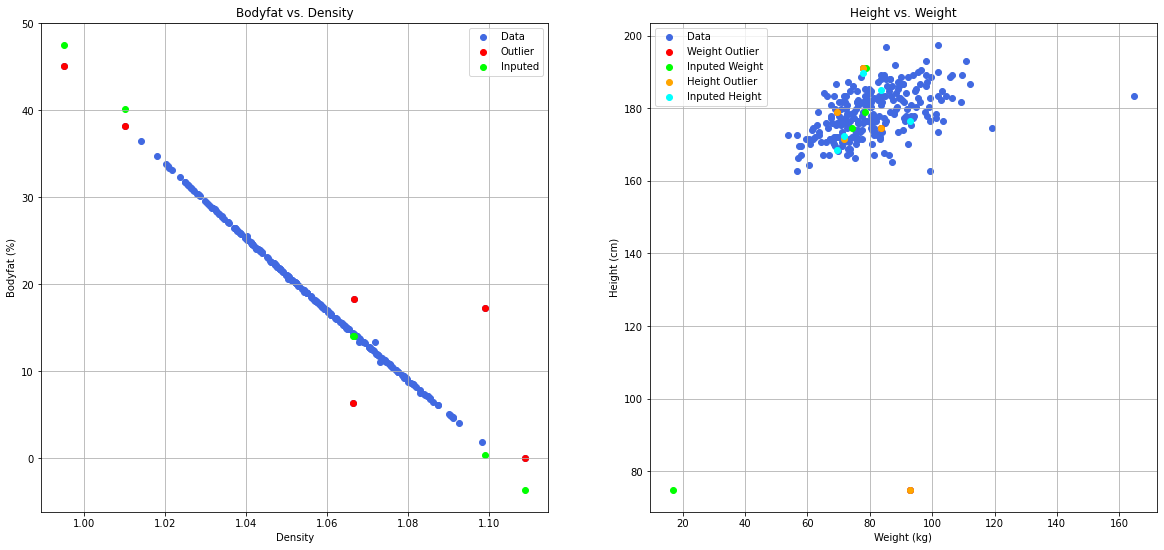

In [6]:
# bodyfat_outliers = df[(df['BODYFAT'] > 35 ) | (df['BODYFAT'] <= 6) | (df['BODYFAT_DIFF'] >= 2)]
bodyfat_outlier = df[(df['BODYFAT_DIFF'] >= 1.8)]
weight_outlier = df[(df['WEIGHT_DIFF'] >= 1)]
height_outlier = df[(df['HEIGHT_DIFF'] >= 1)]

plt.subplots(1,2,figsize=(20,9))

plt.subplot(1,2,1)
plt.scatter(df['DENSITY'], df['BODYFAT'], color='royalblue', label='Data')
plt.scatter(bodyfat_outlier['DENSITY'], bodyfat_outlier['BODYFAT'], color='red', label='Outlier')
plt.scatter(bodyfat_outlier['DENSITY'], bodyfat_outlier['CALC_BODYFAT'], color='lime', label='Inputed')
plt.xlabel('Density')
plt.ylabel('Bodyfat (%)')
plt.title('Bodyfat vs. Density')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.scatter(df['WEIGHT'], df['HEIGHT'], color='royalblue', label='Data')
plt.scatter(weight_outlier['WEIGHT'], weight_outlier['HEIGHT'], color='red', label='Weight Outlier')
plt.scatter(weight_outlier['CALC_WEIGHT'], weight_outlier['HEIGHT'], color='lime', label='Inputed Weight')
plt.scatter(height_outlier['WEIGHT'], height_outlier['HEIGHT'], color='orange', label='Height Outlier')
plt.scatter(height_outlier['WEIGHT'], height_outlier['CALC_HEIGHT'], color='aqua', label='Inputed Height')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Height vs. Weight')
plt.legend()
plt.grid()

In [7]:
bodyfat_outlier[['BODYFAT', 'CALC_BODYFAT', 'BODYFAT_DIFF', 'DENSITY']]

,BODYFAT,CALC_BODYFAT,BODYFAT_DIFF,DENSITY
35,38.2,40.1,1.9,1.0101
47,6.4,14.1,7.7,1.0665
75,18.3,14.1,4.2,1.0666
95,17.3,0.4,16.9,1.0991
181,0.0,-3.6,3.6,1.1089
215,45.1,47.5,2.4,0.9950


In [8]:
height_outlier[['HEIGHT', 'CALC_HEIGHT', 'HEIGHT_DIFF']]

,HEIGHT,CALC_HEIGHT,HEIGHT_DIFF
41,74.9,176.4,101.5
155,191.1,189.8,1.3
162,174.6,185.1,10.5
220,179.1,168.4,10.7
234,171.4,172.4,1.0


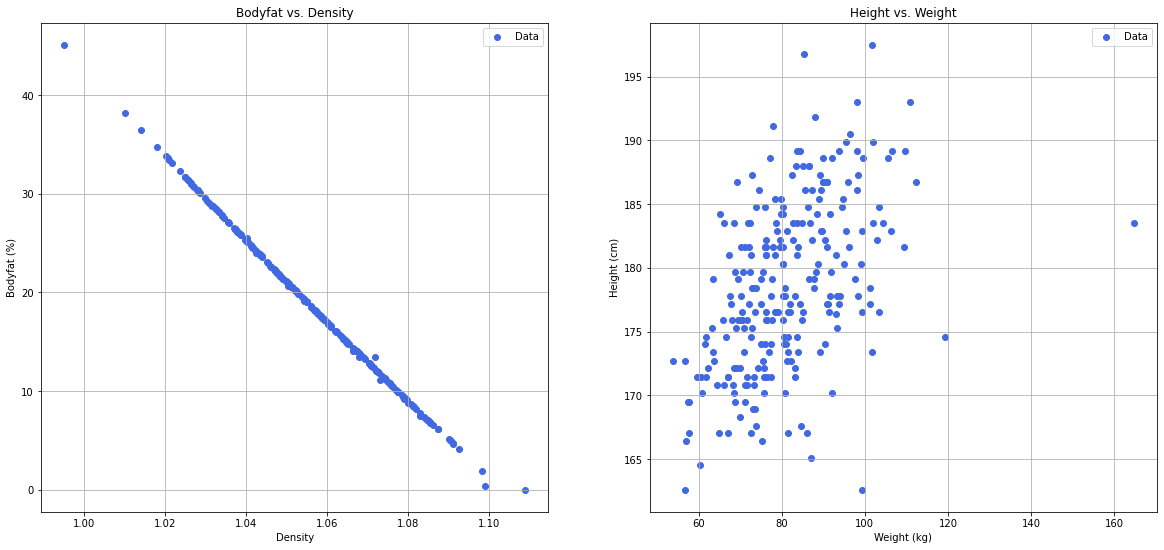

In [9]:
# Imputation of Bodyfat and Height for the selected points (Row 41, 47, 75, 95)
df['BODYFAT'] = np.where((df['BODYFAT'] == 6.4) | (df['BODYFAT'] == 18.3) | (df['BODYFAT'] == 17.3), df['CALC_BODYFAT'], df['BODYFAT'])
df['HEIGHT'] = np.where(df['HEIGHT'] == 74.9, df['CALC_HEIGHT'], df['HEIGHT'])

plt.subplots(1,2,figsize=(20,9))

plt.subplot(1,2,1)
plt.scatter(df['DENSITY'], df['BODYFAT'], color='royalblue', label='Data')
# plt.scatter(bodyfat_outlier['DENSITY'], bodyfat_outlier['BODYFAT'], color='red', label='Outlier')
# plt.scatter(bodyfat_outlier['DENSITY'], bodyfat_outlier['CALC_BODYFAT'], color='lime', label='Inputed')
plt.xlabel('Density')
plt.ylabel('Bodyfat (%)')
plt.title('Bodyfat vs. Density')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.scatter(df['WEIGHT'], df['HEIGHT'], color='royalblue', label='Data')
# plt.scatter(weight_outlier['WEIGHT'], weight_outlier['HEIGHT'], color='red', label='Weight Outlier')
# plt.scatter(weight_outlier['CALC_WEIGHT'], weight_outlier['HEIGHT'], color='lime', label='Inputed Weight')
# plt.scatter(height_outlier['WEIGHT'], height_outlier['HEIGHT'], color='orange', label='Height Outlier')
# plt.scatter(height_outlier['WEIGHT'], height_outlier['CALC_HEIGHT'], color='aqua', label='Inputed Height')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Height vs. Weight')
plt.legend()
plt.grid()

In [11]:
df = df.drop(columns=['DENSITY', 'ADIPOSITY', 'CALC_BODYFAT', 'BODYFAT_DIFF', 'CALC_WEIGHT', 'WEIGHT_DIFF', 'CALC_HEIGHT', 'HEIGHT_DIFF'])
df = df[(stats.zscore(df) < 3).all(axis=1)]

df.head(10)

,BODYFAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,12.6,23,70.0,172.1,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,22,78.6,183.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,22,69.9,168.3,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,26,83.8,183.5,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,24,83.6,181.0,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,20.6,24,95.4,189.9,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,19.0,26,82.1,177.2,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,12.8,25,79.8,184.2,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,5.1,25,86.6,188.0,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,12.0,23,89.9,186.7,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


array([[<AxesSubplot:title={'center':'BODYFAT'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'WEIGHT'}>,
        <AxesSubplot:title={'center':'HEIGHT'}>],
       [<AxesSubplot:title={'center':'NECK'}>,
        <AxesSubplot:title={'center':'CHEST'}>,
        <AxesSubplot:title={'center':'ABDOMEN'}>,
        <AxesSubplot:title={'center':'HIP'}>],
       [<AxesSubplot:title={'center':'THIGH'}>,
        <AxesSubplot:title={'center':'KNEE'}>,
        <AxesSubplot:title={'center':'ANKLE'}>,
        <AxesSubplot:title={'center':'BICEPS'}>],
       [<AxesSubplot:title={'center':'FOREARM'}>,
        <AxesSubplot:title={'center':'WRIST'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

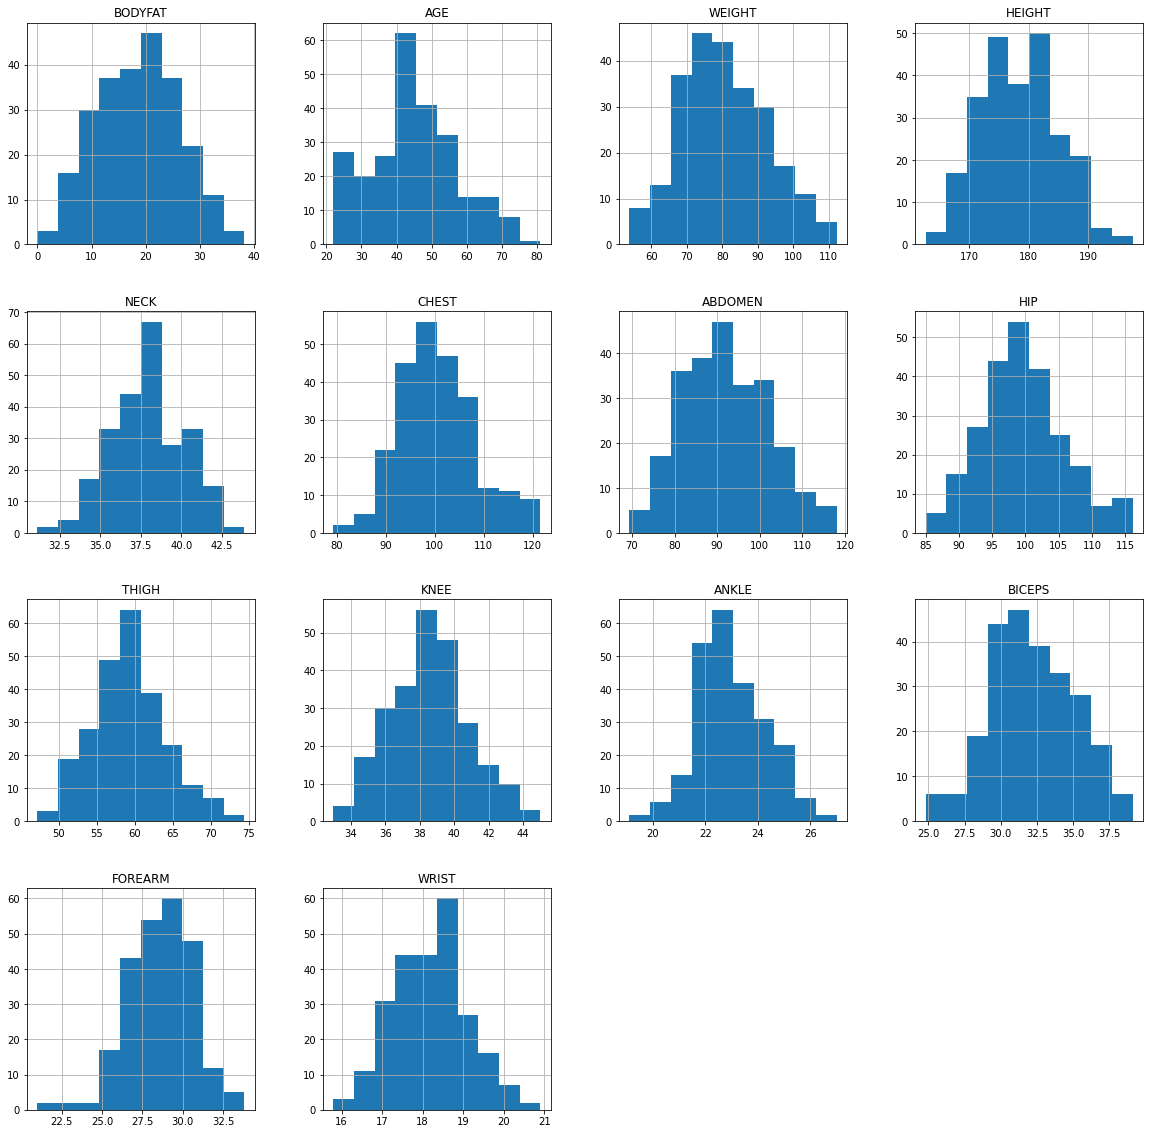

In [12]:
df.hist(figsize=(20, 20))

<AxesSubplot:>

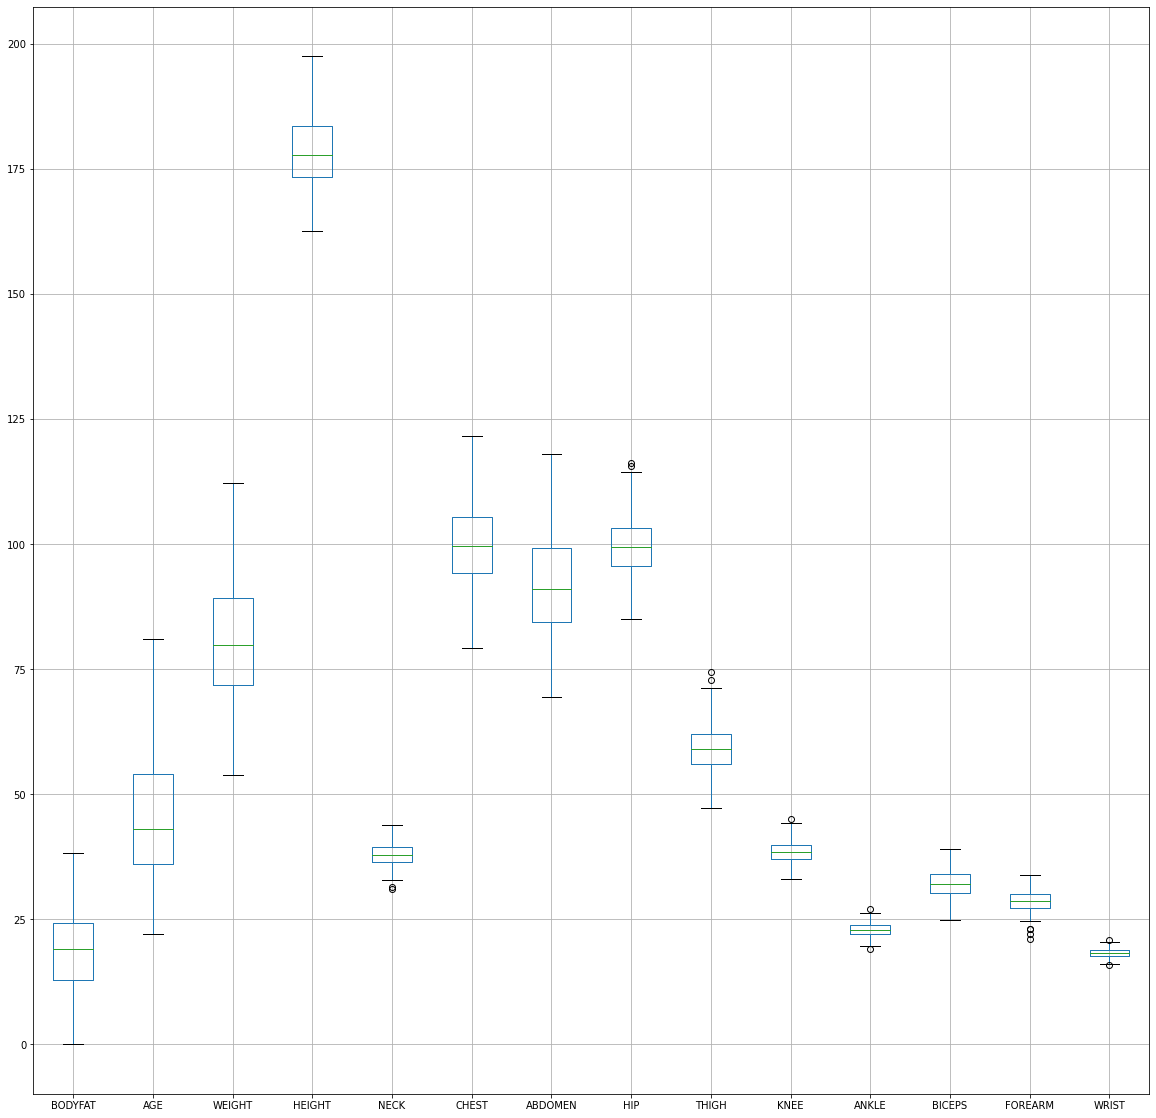

In [13]:
df.boxplot(figsize=(20, 20))

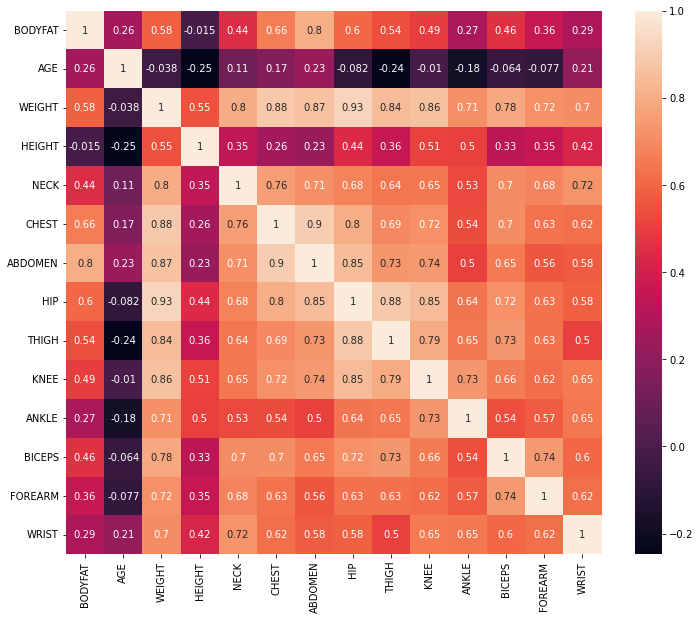

In [14]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.savefig('plot/correlation_matrix.pdf')
plt.show()

--- Feature Importance (from High to Low) ---
ABDOMEN, Score: 0.6760066180146549
HEIGHT, Score: 0.09535532215372412
THIGH, Score: 0.03395254505762482
KNEE, Score: 0.031958673964708334
FOREARM, Score: 0.03169416521218111
BICEPS, Score: 0.022872648533149183
HIP, Score: 0.02213041318950366
ANKLE, Score: 0.02171138749966823
CHEST, Score: 0.016199313922935967
WRIST, Score: 0.015607145739538728
NECK, Score: 0.01383435772305036
AGE, Score: 0.012764406563555625
WEIGHT, Score: 0.005913002425705195


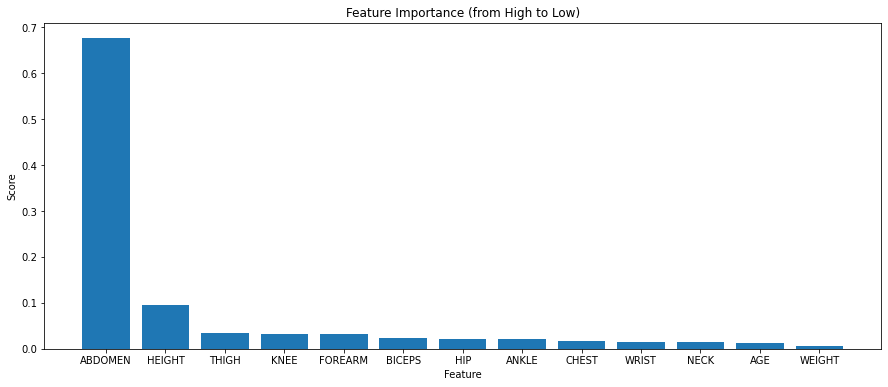

In [15]:
X, y = df.iloc[:,1:], df.iloc[:,0]

dt = DecisionTreeRegressor()
dt.fit(X, y)

feature = list(df.columns)[1:]
importance = dt.feature_importances_
feature_importance = list(zip(feature, importance))
feature_importance.sort(key=lambda x:x[1], reverse=True)
print('--- Feature Importance (from High to Low) ---')
for n, v in feature_importance:
    print(f'{n}, Score: {v}')

plt.figure(figsize=(15, 6))
plt.bar([x[0] for x in feature_importance], [x[1] for x in feature_importance])
plt.title('Feature Importance (from High to Low)')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.savefig('plot/feature_importance.pdf')
plt.show()